 En el presente script se hacen diferentes análisis sobre los dataset seleccionados

In [101]:
import pandas as pd
import numpy as np

In [102]:
# Creación de data frames (DF)
data_1 = {
        'id':            ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido':      ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']
        }

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}


data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

DF1 = pd.DataFrame(data_1)
DF2 = pd.DataFrame(data_2)
DF3 = pd.DataFrame(data_3)

#DF1.head()
DF2.head()
#DF3.head()


,id,primer_nombre,apellido
0,4,Luis,Ruiz
1,5,Brian,Giralgo
2,6,Mariana,Ortegon
3,7,Marcela,Palacios
4,8,Carlos,Gallego


#  1.1 Join DataFrame

In [103]:
# Unir DF1 y DF2 a lo largo de filas y asignar todos los datos
join_fil = pd.concat([DF1, DF2],axis=1)
join_fil


,id,primer_nombre,apellido,id,primer_nombre,apellido
0,1,Alex,Anderson,4,Luis,Ruiz
1,2,Amy,Ruales,5,Brian,Giralgo
2,3,Valentina,Marin,6,Mariana,Ortegon
3,4,Alice,Barbosa,7,Marcela,Palacios
4,5,Lina,Robles,8,Carlos,Gallego


In [104]:
# Unir DF1 y DF2 a lo largo de columnas y asignar todos los datos
join_col = pd.concat([DF1, DF2])
join_col

,id,primer_nombre,apellido
0,1,Alex,Anderson
1,2,Amy,Ruales
2,3,Valentina,Marin
3,4,Alice,Barbosa
4,5,Lina,Robles
0,4,Luis,Ruiz
1,5,Brian,Giralgo
2,6,Mariana,Ortegon
3,7,Marcela,Palacios
4,8,Carlos,Gallego


In [105]:
# Hacer un merge para todos los datos y el tercer DF con el valor id.
join_outer = join_col.merge(DF3,on = 'id',how="outer")
join_outer

,id,primer_nombre,apellido,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ruales,15.0
2,3,Valentina,Marin,15.0
3,4,Alice,Barbosa,61.0
4,4,Luis,Ruiz,61.0
5,5,Lina,Robles,16.0
6,5,Brian,Giralgo,16.0
7,6,Mariana,Ortegon,NaN
8,7,Marcela,Palacios,14.0
9,8,Carlos,Gallego,15.0


In [106]:
#Hacer una merge solo los datos que tienen el mismo ′id′
join_inner = join_col.merge(DF3,on = 'id',how="inner")
join_inner

,id,primer_nombre,apellido,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ruales,15
2,3,Valentina,Marin,15
3,4,Alice,Barbosa,61
4,4,Luis,Ruiz,61
5,5,Lina,Robles,16
6,5,Brian,Giralgo,16
7,7,Marcela,Palacios,14
8,8,Carlos,Gallego,15


#   2.2 GroupBy

In [175]:
# Lectura de datos

datos_alcohol=pd.read_csv("./data/datos_alcohol.txt",index_col=False) 
#datos_alcohol.head(None)
#datos_alcohol.iloc[[1,10,20,23,24,25,6,5],[0,5]] #fila, columna
#datos_alcohol["continente"].nunique()
datos_alcohol.groupby('continente').nunique()

,pais,porciones_cerveza,porciones_licor,porciones_vino,litros_totales_de_alcohol_puro
continente,,,,,
AF,53,43,26,23,36
AS,44,28,31,15,27
EU,45,41,40,43,33
OC,16,14,14,13,14
SA,12,12,12,10,11


In [110]:
# ¿Qué continente toma más cerveza en promedio?

# Se agrupa por continente y se saca promedio 
cerveza = datos_alcohol.groupby("continente").porciones_cerveza.mean()

print(" El continente que toma más cerveza es Europa")
cerveza



 El continente que toma más cerveza es Europa


continente
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: porciones_cerveza, dtype: float64

# Analizar la columna de vino e imprimir un análisis básico estadístico del consumo

In [117]:
# Analizar la columna de vino e imprimir un análisis básico estadístico del consumo

datos_vino = datos_alcohol.copy()
new_datos_vino = datos_vino.drop(columns=["porciones_cerveza" , "porciones_licor", "litros_totales_de_alcohol_puro"]) 
new_datos_vino.describe()

,porciones_vino
count,193.000000
mean,49.450777
std,79.697598
min,0.000000
25%,1.000000
50%,8.000000
75%,59.000000
max,370.000000


In [118]:
# Continentes con mayor y menor registro de consumo promedio de porciones de vino

vino = datos_alcohol.groupby("continente").porciones_vino.mean()
print("Análisis 1:")
print("El continente que toma más vino es Europa con un promedio de 142.22 porciones")
print("El continente que toma menos vino es Asia con un promedio de 9.06 porciones")
vino



Análisis 1:
El continente que toma más vino es Europa con un promedio de 142.22 porciones
El continente que toma menos vino es Asia con un promedio de 9.06 porciones


continente
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: porciones_vino, dtype: float64

In [123]:
# País de África con el mayor registro de porciones de vino
AF = new_datos_vino[(new_datos_vino.continente=="AF")].sort_values("porciones_vino",ascending=False).head()
print("Análisis 2:")
print("El país de África con mayor registro de porciones de vino es Guinea Ecuatorial")
AF


Análisis 2:
El país de África con mayor registro de porciones de vino es Guinea Ecuatorial


,pais,porciones_vino,continente
55,Equatorial Guinea,233,AF
148,Sao Tome & Principe,140,AF
159,South Africa,81,AF
62,Gabon,59,AF
152,Seychelles,51,AF


In [124]:
# País de europa con el mayor registro de porciones de vino
AF = new_datos_vino[(new_datos_vino.continente=="EU")].sort_values("porciones_vino",ascending=False).head()
print("Análisis 3:")
print("El país de europa con mayor registro de porciones de vino es Francia")
AF

Análisis 3:
El país de europa con mayor registro de porciones de vino es Francia


,pais,porciones_vino,continente
61,France,370,EU
136,Portugal,339,EU
3,Andorra,312,EU
166,Switzerland,280,EU
48,Denmark,278,EU


In [126]:
# País con el mayor registro de porciones de Vino de todos los continentes es Francia

new_datos_vino.sort_values("porciones_vino",ascending=False).head()
print("Análisis 3:")
print("País con el mayor registro de porciones de Vino de todos los continentes es Francia")
new_datos_vino

Análisis 3:
País con el mayor registro de porciones de Vino de todos los continentes es Francia


,pais,porciones_vino,continente
0,Afghanistan,0,AS
1,Albania,54,EU
2,Algeria,14,AF
3,Andorra,312,EU
4,Angola,45,AF
...,...,...,...
188,Venezuela,3,SA
189,Vietnam,1,AS
190,Yemen,0,AS
191,Zambia,4,AF


# Para cada continente imprime los valores medio, mínimo y máximo para el consumo de licor

In [178]:
# Se filtra columna de porciones de licor
datos_licor = datos_alcohol.copy()
new_datos_licor = datos_licor.drop(columns=["porciones_cerveza" , "porciones_vino", "litros_totales_de_alcohol_puro"]) 
new_datos_licor


,pais,porciones_licor,continente
0,Afghanistan,0,AS
1,Albania,132,EU
2,Algeria,0,AF
3,Andorra,138,EU
4,Angola,57,AF
...,...,...,...
188,Venezuela,100,SA
189,Vietnam,2,AS
190,Yemen,0,AS
191,Zambia,19,AF


In [229]:
# Para conocer la lista de continentes reportados y su notación: AF, AS, EU, OC, SA
new_datos_licor.groupby('continente').nunique()


,pais,porciones_licor
continente,,
AF,53,26
AS,44,31
EU,45,40
OC,16,14
SA,12,12


In [183]:
# África
AF_L = new_datos_licor[(new_datos_licor.continente=="AF")]
AF_L.head()


,pais,porciones_licor,continente
2,Algeria,0,AF
4,Angola,57,AF
18,Benin,4,AF
22,Botswana,35,AF
26,Burkina Faso,7,AF


In [184]:
media_AF_L = float(AF_L.mean(numeric_only=True))
max_AF_L = float(AF_L.max(numeric_only=True))
min_AF_L = float(AF_L.min(numeric_only=True))
print("El consumo promedio de licor en África es de ", round(media_AF_L,2),"porciones")
print("El consumo mínimo de licor en África es de ", round(min_AF_L,2),"porciones")
print("El consumo máximo de licor en África es de ", round(max_AF_L,2),"porciones")


El consumo promedio de licor en África es de  16.34 porciones
El consumo mínimo de licor en África es de  0.0 porciones
El consumo máximo de licor en África es de  152.0 porciones


In [185]:
# Europa
EU_L = new_datos_licor[(new_datos_licor.continente=="EU")]
EU_L.head()


,pais,porciones_licor,continente
1,Albania,132,EU
3,Andorra,138,EU
7,Armenia,179,EU
9,Austria,75,EU
10,Azerbaijan,46,EU


In [188]:
media_EU_L = float(EU_L.mean(numeric_only=True))
max_EU_L = float(EU_L.max(numeric_only=True))
min_EU_L = float(EU_L.min(numeric_only=True))
print("El consumo promedio de licor en Europa es de ", round(media_EU_L,2),"porciones")
print("El consumo mínimo de licor en Europa es de ", round(min_EU_L,2),"porciones")
print("El consumo máximo de licor en Europa es de ", round(max_EU_L,2),"porciones")

El consumo promedio de licor en Europa es de  132.56 porciones
El consumo mínimo de licor en Europa es de  0.0 porciones
El consumo máximo de licor en Europa es de  373.0 porciones


In [216]:
# Asia
AS_L = new_datos_licor[(new_datos_licor.continente=="AS")]
AS_L.head()

,pais,porciones_licor,continente
0,Afghanistan,0,AS
12,Bahrain,63,AS
13,Bangladesh,0,AS
19,Bhutan,0,AS
24,Brunei,2,AS


In [217]:
media_AS_L = float(AS_L.mean(numeric_only=True))
max_AS_L = float(AS_L.max(numeric_only=True))
min_AS_L = float(AS_L.min(numeric_only=True))
print("El consumo promedio de licor en Asia es de ", round(media_AS_L,2),"porciones")
print("El consumo mínimo de licor en Asia es de ", round(min_AS_L,2),"porciones")
print("El consumo máximo de licor en Asia es de ", round(max_AS_L,2),"porciones")

El consumo promedio de licor en Asia es de  60.84 porciones
El consumo mínimo de licor en Asia es de  0.0 porciones
El consumo máximo de licor en Asia es de  326.0 porciones


In [220]:
# SA America
SA_L = new_datos_licor[(new_datos_licor.continente=="SA")]
SA_L.head()

,pais,porciones_licor,continente
6,Argentina,25,SA
20,Bolivia,41,SA
23,Brazil,145,SA
35,Chile,124,SA
37,Colombia,76,SA


In [221]:
media_SA_L = float(SA_L.mean(numeric_only=True))
max_SA_L = float(SA_L.max(numeric_only=True))
min_SA_L = float(SA_L.min(numeric_only=True))
print("El consumo promedio de licor en America es de ", round(media_SA_L,2),"porciones")
print("El consumo mínimo de licor en America es de ", round(min_SA_L,2),"porciones")
print("El consumo máximo de licor en America es de ", round(max_SA_L,2),"porciones")

El consumo promedio de licor en America es de  114.75 porciones
El consumo mínimo de licor en America es de  25.0 porciones
El consumo máximo de licor en America es de  302.0 porciones


In [222]:
# Oceanía
OC_L = new_datos_licor[(new_datos_licor.continente=="OC")]
OC_L.head()

,pais,porciones_licor,continente
8,Australia,72,OC
40,Cook Islands,254,OC
59,Fiji,35,OC
89,Kiribati,34,OC
106,Marshall Islands,0,OC


In [223]:
media_OC_L = float(OC_L.mean(numeric_only=True))
max_OC_L = float(OC_L.max(numeric_only=True))
min_OC_L = float(OC_L.min(numeric_only=True))
print("El consumo promedio de licor en Oceanía es de ", round(media_OC_L,2),"porciones")
print("El consumo mínimo de licor en Oceanía es de ", round(min_OC_L,2),"porciones")
print("El consumo máximo de licor en Oceanía es de ", round(max_OC_L,2),"porciones")

El consumo promedio de licor en Oceanía es de  58.44 porciones
El consumo mínimo de licor en Oceanía es de  0.0 porciones
El consumo máximo de licor en Oceanía es de  254.0 porciones


# Para cada continente imprime el consumo medio de alcohol para todas la columnas.


In [231]:
datos_alcohol_mean = datos_alcohol.groupby(by="continente") 
datos_alcohol_mean.mean()

,porciones_cerveza,porciones_licor,porciones_vino,litros_totales_de_alcohol_puro
continente,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


# 1.3 Visualización

In [303]:
visual = pd.read_csv("./data/visulualizacion.txt") 
visual



,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


# Histograma de columna total_bill.

In [258]:
! pip install seaborn
! pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt


Text(13.819444444444445, 0.5, 'Frequency')

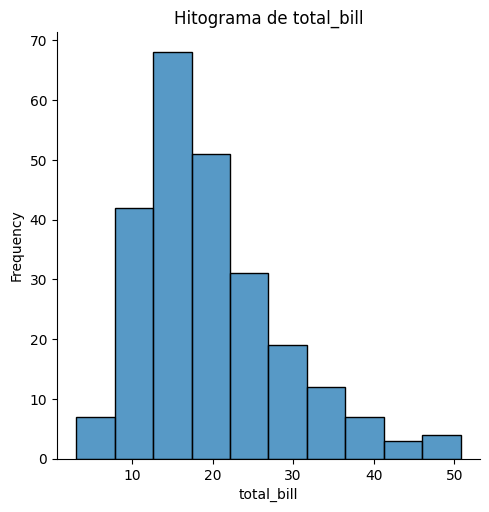

In [261]:
tot_bill = visual['total_bill']
sns.displot(tot_bill,kde=False,bins=10)
plt.title("Hitograma de total_bill")
plt.ylabel("Frequency")


# Crear un scatter plot presentando la relación entre total_bill y tip

c:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Relación entre total_bill y tip')

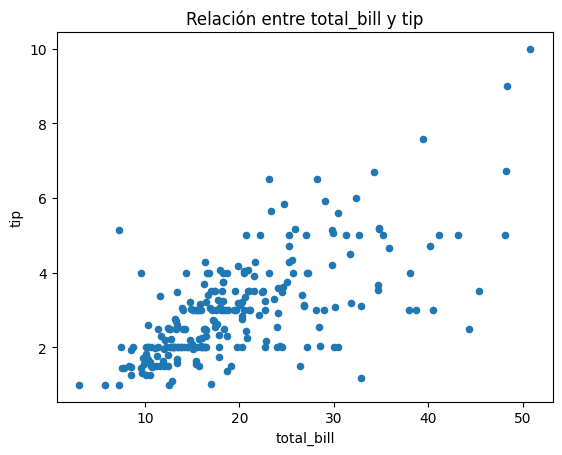

In [263]:
visual.plot.scatter(x='total_bill', y='tip')
plt.title("Relación entre total_bill y tip")

# Presentar una relación entre los valores de los days y total_bill

<AxesSubplot: title={'center': 'total_bill'}, xlabel='day'>

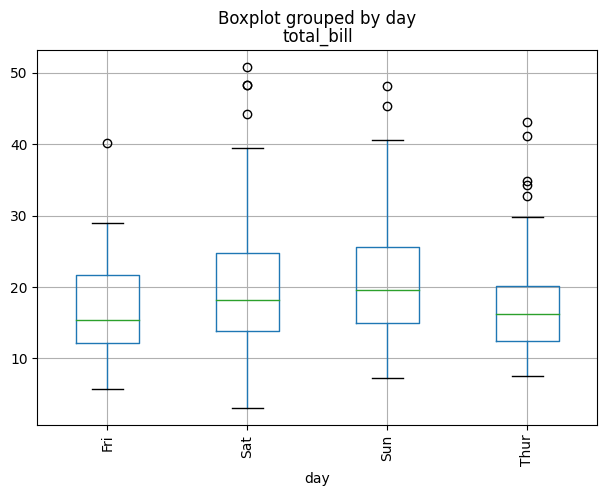

In [307]:
only = visual[['day','total_bill']]

only.boxplot('total_bill',by='day',figsize=(7,5),rot=90)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

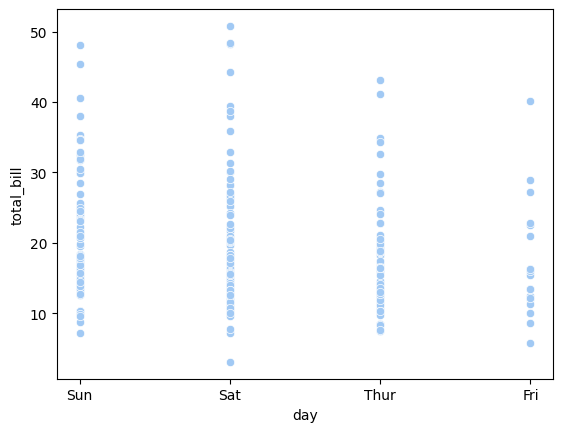

In [326]:
# Otro tipo de gráfico

sns.scatterplot(x="day", y="total_bill", data=only)


# Cree un bax plot que presente el total_bill por día diferenciando la hora (Cena o Almuerzo)

<AxesSubplot: xlabel='total_bill', ylabel='day'>

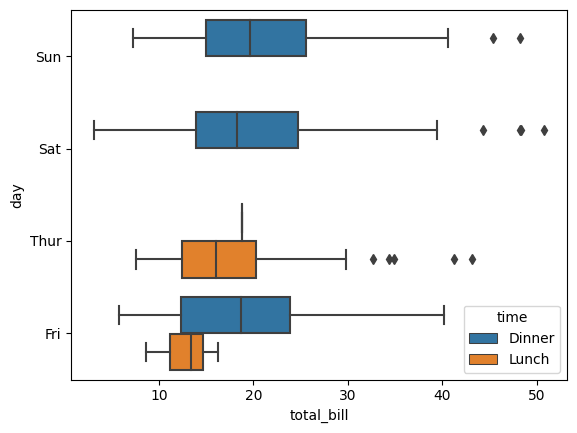

In [311]:
only3 = visual[['day','total_bill','time']]

sns.boxplot(only3,x="total_bill",y = "day", hue="time")